In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("/home/theuri/Documents/ADS/Assignment 7/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
freq_table = df.groupby(['charges']).size().reset_index(name='Count')
freq_table

,charges,Count
0,1121.87390,1
1,1131.50660,1
2,1135.94070,1
3,1136.39940,1
4,1137.01100,1
...,...,...
1332,55135.40209,1
1333,58571.07448,1
1334,60021.39897,1
1335,62592.87309,1


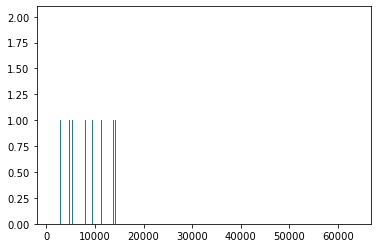

In [13]:
plt.bar(freq_table['charges'], freq_table['Count'])
plt.show()

In [14]:
df["charges"].mean()

13270.422265141257

In [15]:
df["charges"].max()

63770.42801

In [16]:
df["charges"].min()

1121.8739

In [17]:
df["charges"].mode()

0    1639.5631
dtype: float64

In [18]:
df["charges"].median()

9382.033

In [22]:
df["age"].max()

64

In [23]:
df["age"].min()

18

In [26]:
age_length_ranges = ["[{0} - {1})".format(age, age + 5.0) for age in range(15, 65, 5)]
age_length_ranges

['[15 - 20.0)',
 '[20 - 25.0)',
 '[25 - 30.0)',
 '[30 - 35.0)',
 '[35 - 40.0)',
 '[40 - 45.0)',
 '[45 - 50.0)',
 '[50 - 55.0)',
 '[55 - 60.0)',
 '[60 - 65.0)']

In [27]:
count_age_length_ranges = len(age_length_ranges)
count_age_length_ranges

10

In [30]:
df['Age_Range'] = pd.cut(x=df['age'], bins=count_age_length_ranges, labels=age_length_ranges)
df.head()

,age,sex,bmi,children,smoker,region,charges,Age_Range
0,19,female,27.900,0,yes,southwest,16884.92400,[15 - 20.0)
1,18,male,33.770,1,no,southeast,1725.55230,[15 - 20.0)
2,28,male,33.000,3,no,southeast,4449.46200,[25 - 30.0)
3,33,male,22.705,0,no,northwest,21984.47061,[30 - 35.0)
4,32,male,28.880,0,no,northwest,3866.85520,[30 - 35.0)


In [29]:
age_len_hist_df = df['Age_Range'].value_counts()
age_len_hist_df

[15 - 20.0)    222
[45 - 50.0)    144
[20 - 25.0)    140
[35 - 40.0)    129
[55 - 60.0)    128
[30 - 35.0)    128
[60 - 65.0)    114
[50 - 55.0)    114
[40 - 45.0)    110
[25 - 30.0)    109
Name: Age_Range, dtype: int64

In [31]:
df_range_hist = pd.DataFrame(age_len_hist_df).reset_index()
df_range_hist.columns = ['Age_Range', 'Count']
df_range_hist

,Age_Range,Count
0,[15 - 20.0),222
1,[45 - 50.0),144
2,[20 - 25.0),140
3,[35 - 40.0),129
4,[55 - 60.0),128
5,[30 - 35.0),128
6,[60 - 65.0),114
7,[50 - 55.0),114
8,[40 - 45.0),110
9,[25 - 30.0),109


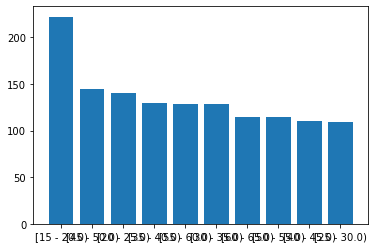

In [35]:
plt.bar(df_range_hist["Age_Range"], df_range_hist["Count"])
plt.show()

Majority of those under consideration are between the Age Range of 15 and 20 years old

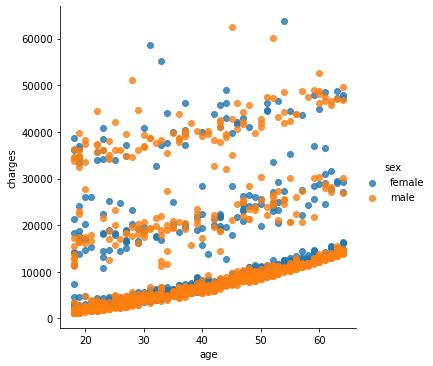

In [37]:
#Scatter Plot
sns.lmplot(x='age', y='charges', hue='sex', fit_reg=False, data=df)


In [42]:
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


## numerical_discrete

In [49]:
age_range_vars = [var for var in numerical if 'Age_Range' in var]

age_range_vars

['Age_Range']

In [50]:
# let's visualise the values of the discrete variables
discrete = []

for var in numerical:
    if len(df[var].unique())<70 and var not in age_range_vars:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

age  values:  [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
children  values:  [0 1 3 2 5 4]

There are 2 discrete variables


## numerical_continuous

In [54]:
# find continuous variables
# let's remember to skip the Age_Range and the target variable charges, which are both also numerical

numerical = [var for var in numerical if var not in discrete and var not in ['Age_Range', 'charges'] and var not in age_range_vars]
print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 1 numerical and continuous variables


In [55]:
numerical

['bmi']

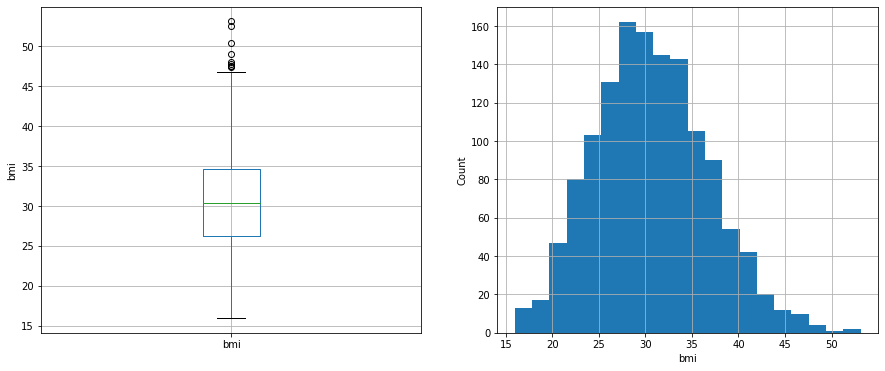

In [59]:
for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df[var].hist(bins=20)
    fig.set_ylabel('Count')
    fig.set_xlabel(var)

    plt.show()

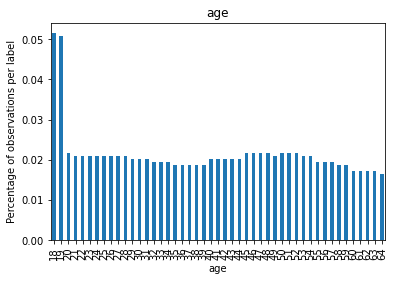

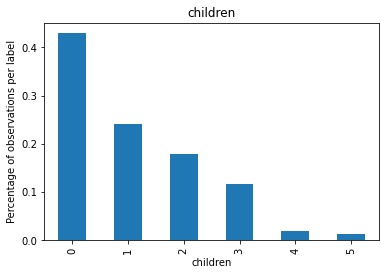

In [61]:
# outlies in discrete variables
for var in discrete:
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

<AxesSubplot:xlabel='bmi'>

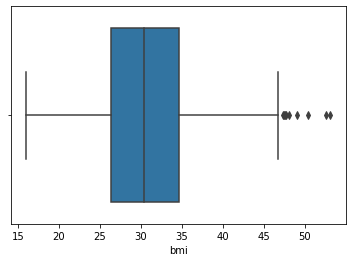

In [62]:
sns.boxplot(x=df['bmi'])

In [84]:
df_c = df

In [85]:
from scipy import stats

#scipy > numpy > pandas/Sklearn
df_c = df['bmi']
zscore = np.abs(stats.zscore(df_c))
zscore

array([0.45332   , 0.5096211 , 0.38330685, ..., 1.0148781 , 0.79781341,
       0.26138796])

In [86]:
threshold = 30
np.where(zscore > 30)

(array([], dtype=int64),)

In [87]:
df_iqr = df
Q1 = df_iqr.quantile(0.25)
Q3 = df_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [88]:
(df_iqr < (Q1 - threshold * IQR)) | (df_iqr > (Q3 + threshold * IQR))

TypeError: Cannot compare a Categorical for op __lt__ with type <class 'numpy.ndarray'>.
If you want to compare values, use 'np.asarray(cat) <op> other'.

In [83]:
threshold = 30
df_clean = df
df_clean = df_clean[(zscore < threshold).all()]

df.shape

KeyError: True

In [89]:
#Remove Outliers using IQR
zscore = 30
df_iqr_clean = df_iqr[~((df_iqr < (Q1 - zscore * IQR)) | (df_iqr > (Q3 + zscore * IQR))).any(axis=1)]
df_iqr_clean.shape

TypeError: Cannot compare a Categorical for op __lt__ with type <class 'numpy.ndarray'>.
If you want to compare values, use 'np.asarray(cat) <op> other'.

In [90]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [93]:
df.groupby(['sex']).count()

,age,bmi,children,smoker,region,charges,Age_Range
sex,,,,,,,
female,662,662,662,662,662,662,662
male,676,676,676,676,676,676,676


In [95]:
df.groupby(['smoker']).count()

,age,sex,bmi,children,region,charges,Age_Range
smoker,,,,,,,
no,1064,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274,274


In [96]:
df.groupby(['region']).count()

,age,sex,bmi,children,smoker,charges,Age_Range
region,,,,,,,
northeast,324,324,324,324,324,324,324
northwest,325,325,325,325,325,325,325
southeast,364,364,364,364,364,364,364
southwest,325,325,325,325,325,325,325


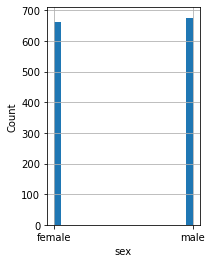

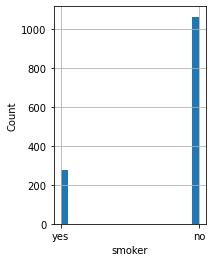

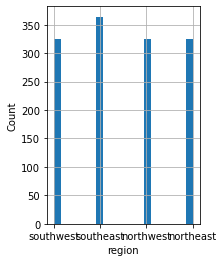

In [98]:
for var in categorical:
    plt.subplot(1, 2, 2)
    fig = df[var].hist(bins=20)
    fig.set_ylabel('Count')
    fig.set_xlabel(var)

    plt.show()